In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
#nltk.download("stopwords")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from matplotlib import style
style.use('dark_background')
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
style.use('dark_background')

In [3]:
#reads document and standardizes user scores

df = pd.read_csv('gamereviews.csv')
df = df.drop(df.columns[[0, 1, 5]], axis=1)
df.dropna(inplace=True)
df['Userscore'] = StandardScaler().fit_transform(df[['Userscore']])

print(df.head(), df['Userscore'].describe())

     Platform  Userscore                                            Comment
0  Nintendo64   0.760493  Everything in OoT is so near at perfection, it...
1  Nintendo64   0.760493  I won't bore you with what everyone is already...
2  Nintendo64   0.760493  Anyone who gives the masterpiece below a 7 or ...
3  Nintendo64   0.760493  I'm one of those people who think that this is...
4  Nintendo64   0.760493   This game is the highest rated game on Metacr... count    2.839600e+05
mean    -2.562318e-17
std      1.000002e+00
min     -2.432663e+00
25%     -1.974537e-01
50%      4.411776e-01
75%      7.604933e-01
max      7.604933e-01
Name: Userscore, dtype: float64


In [4]:
#converts scores to sentiment

df['Polarity'] = df['Userscore'].apply(lambda x: 'Positive' if (x > .76) else('Neutral' if (x <= .76) and (x >= -.197)  else 'Negative'))
df.head()

,Platform,Userscore,Comment,Polarity
0,Nintendo64,0.760493,"Everything in OoT is so near at perfection, it...",Positive
1,Nintendo64,0.760493,I won't bore you with what everyone is already...,Positive
2,Nintendo64,0.760493,Anyone who gives the masterpiece below a 7 or ...,Positive
3,Nintendo64,0.760493,I'm one of those people who think that this is...,Positive
4,Nintendo64,0.760493,This game is the highest rated game on Metacr...,Positive


In [5]:
n = df['Userscore'].apply(lambda x: 2 if (x > .76) else(1 if (x <= .76) and (x >= -.197)  else 0))
n.head()

0    2
1    2
2    2
3    2
4    2
Name: Userscore, dtype: int64

In [6]:
df['Polarity'].describe()

count       283960
unique           3
top       Positive
freq        112522
Name: Polarity, dtype: object

<AxesSubplot:>

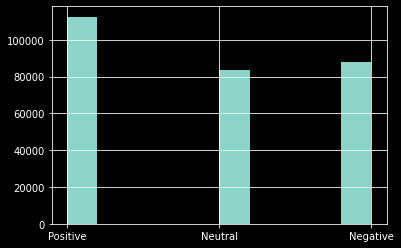

In [7]:
df['Polarity'].hist()

In [8]:
#function to get rid of stopwords and all non-letter characters

def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [9]:
#applies function and also converts all letters to lowercase

df['Comment'] = df['Comment'].apply(get_text_processing)
df['Comment'] = df['Comment'].str.lower()
df.head()

,Platform,Userscore,Comment,Polarity
0,Nintendo64,0.760493,everything oot near perfection really wonder g...,Positive
1,Nintendo64,0.760493,wont bore everyone already saying amazing game...,Positive
2,Nintendo64,0.760493,anyone gives masterpiece 7 8 either hate astou...,Positive
3,Nintendo64,0.760493,im one people think greatest game time matter ...,Positive
4,Nintendo64,0.760493,game highest rated game metacritic good reason...,Positive


In [10]:
#create polarity variables

p = df['Polarity']
onehot = pd.get_dummies(p)
df.drop(['Polarity', 'Platform', 'Userscore'], axis=1, inplace=True)
df = pd.concat([df, onehot], axis=1)

In [11]:
df = df.reset_index(drop=True)
df

,Comment,Negative,Neutral,Positive
0,everything oot near perfection really wonder g...,0,0,1
1,wont bore everyone already saying amazing game...,0,0,1
2,anyone gives masterpiece 7 8 either hate astou...,0,0,1
3,im one people think greatest game time matter ...,0,0,1
4,game highest rated game metacritic good reason...,0,0,1
...,...,...,...,...
283955,extremely similar eo4 obviously isnt bad thing...,1,0,0
283956,typical overrated atlus trash game liked since...,1,0,0
283957,find story mode annoying characters intrusive ...,0,1,0
283958,pretty good certainly lacks visual audio polis...,0,1,0


In [12]:
X = df['Comment']
y = df.drop('Comment', axis=1)
print(X, y)

0         everything oot near perfection really wonder g...
1         wont bore everyone already saying amazing game...
2         anyone gives masterpiece 7 8 either hate astou...
3         im one people think greatest game time matter ...
4         game highest rated game metacritic good reason...
                                ...                        
283955    extremely similar eo4 obviously isnt bad thing...
283956    typical overrated atlus trash game liked since...
283957    find story mode annoying characters intrusive ...
283958    pretty good certainly lacks visual audio polis...
283959    first game etrian series hard time got used ch...
Name: Comment, Length: 283960, dtype: object         Negative  Neutral  Positive
0              0        0         1
1              0        0         1
2              0        0         1
3              0        0         1
4              0        0         1
...          ...      ...       ...
283955         1        0         0
283956 

In [13]:
import nltk
#nltk.download()
#from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

lancaster = LancasterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(lancaster.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

XS = pd.DataFrame(X)
for i in range(0, len(X)):
    XS.loc[i] = stemSentence(X[i])
    
print(XS)

                                                  Comment
0       everyth oot near perfect real wond gam hug fan...
1       wont bor everyon already say amaz gam yo fent ...
2       anyon giv masterpiec 7 8 eith hat astound zeld...
3       im on peopl think greatest gam tim mat qual ga...
4       gam highest rat gam metacrit good reason tak e...
...                                                   ...
283955  extrem simil eo4 obvy isnt bad thing id say we...
283956  typ over atl trash gam lik sint oldtim hardc p...
283957  find story mod annoy charact intrud story clas...
283958  pretty good certain lack vis audio pol iv many...
283959  first gam et sery hard tim got us check map du...

[283960 rows x 1 columns]


dimension reduction filtering by frequency

In [14]:
vect = CountVectorizer(strip_accents = 'unicode', max_df = .995, min_df = .005)
XX = vect.fit_transform(XS['Comment'])

tfidf = TfidfTransformer()
XX = tfidf.fit_transform(XX)
XX.shape

(283960, 1460)

dimension reduction by svd

In [15]:
from numpy import array
from scipy.sparse.linalg import svds

u, s, v = svds(XX)
u.shape

(283960, 6)

In [16]:
import numpy as np
from sklearn import datasets, cluster

agglo = cluster.FeatureAgglomeration(n_clusters = 42)
agglo.fit(XX.toarray())
XR = agglo.transform(XX.toarray())
XR.shape

(283960, 42)

In [17]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(XX, p, test_size = 0.2, random_state = 42)
xtru, xteu, ytru, yteu = train_test_split(u, p, test_size = 0.2, random_state = 42)
xtrr, xter, ytrr, yter = train_test_split(XR, p, test_size = 0.2, random_state = 42)

In [18]:
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

KNN model run with both regular df and svd df

cv infeasible due to compute resources needed

from sklearn.neighbors import KNeighborsClassifier

pg = /{'n_neighbors':np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(estimator = knn, param_grid = pg, cv = 5)
knn_cv.fit(XX, p)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

knn = KNeighborsClassifier(knn_cv.best_params_['n_neighbors'])
knn.fit(xte, yte)
ypr = knn.predict(xte)
print(confusion_matrix(yte, ypr), classification_report(yte, ypr))

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(100)
knn.fit(xtr, ytr)
ypr = knn.predict(xte)
print(confusion_matrix(yte, ypr), classification_report(yte, ypr))

#accuracy of .41, not a good model

[[ 1607  1376 14713]
 [ 1065  1576 14077]
 [ 1236  1532 19610]]               precision    recall  f1-score   support

    Negative       0.41      0.09      0.15     17696
     Neutral       0.35      0.09      0.15     16718
    Positive       0.41      0.88      0.55     22378

    accuracy                           0.40     56792
   macro avg       0.39      0.35      0.28     56792
weighted avg       0.39      0.40      0.31     56792



from sklearn.neighbors import KNeighborsClassifier


pg = {'n_neighbors':np.arange(1, 100)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(estimator = knn, param_grid = pg, cv = 5)
knn_cv.fit(u, p)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

knn = KNeighborsClassifier(knn_cv.best_params_['n_neighbors'])

In [18]:
knn = KNeighborsClassifier(300)
knn.fit(xtru, ytru)
ypr = knn.predict(xteu)
print(confusion_matrix(yteu, ypr), classification_report(yteu, ypr))

[[11128  2807  3761]
 [ 5203  4932  6583]
 [ 4889  3101 14388]]               precision    recall  f1-score   support

    Negative       0.52      0.63      0.57     17696
     Neutral       0.45      0.30      0.36     16718
    Positive       0.58      0.64      0.61     22378

    accuracy                           0.54     56792
   macro avg       0.52      0.52      0.51     56792
weighted avg       0.53      0.54      0.52     56792



from sklearn.neighbors import KNeighborsClassifier


pg = {'n_neighbors':np.arange(1, 100)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(estimator = knn, param_grid = pg, cv = 5)
knn_cv.fit(XR, p)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

knn = KNeighborsClassifier(knn_cv.best_params_['n_neighbors'])

In [19]:
knn = KNeighborsClassifier(300)
knn.fit(xtrr, ytrr)
ypr = knn.predict(xter)
print(confusion_matrix(yter, ypr), classification_report(yter, ypr))

[[14236  1134  2326]
 [ 8735  2797  5186]
 [ 8205  2131 12042]]               precision    recall  f1-score   support

    Negative       0.46      0.80      0.58     17696
     Neutral       0.46      0.17      0.25     16718
    Positive       0.62      0.54      0.57     22378

    accuracy                           0.51     56792
   macro avg       0.51      0.50      0.47     56792
weighted avg       0.52      0.51      0.48     56792



Random Forest model not feasible due to compute resources needed

from sklearn.ensemble import RandomForestClassifier

pg = {'bootstrap':[True, False], 
      'max_depth':np.arange(2, 10), 
      'min_samples_leaf': np.arange(2, 5), 
      'min_samples_split': np.arange(2, 5)}
forest = RandomForestClassifier(n_estimators = 100)
forest_cv= GridSearchCV(estimator = forest, param_grid = pg, cv = 5)
forest_cv.fit(u, p)

print("Best Score:" + str(forest_cv.best_score_))
print("Best Parameters: " + str(forest_cv.best_params_))

#.53 accuracy: not better than knn, takes 8 hrs to run

forest = RandomForestClassifier(n_estimators = 1000, 
                                bootstrap = forest_cv.best_params_['bootstrap'], 
                                max_depth = forest_cv.best_params_['max_depth'], 
                                min_samples_leaf = forest_cv.best_params_['min_samples_leaf'], 
                                min_samples_split = forest_cv.best_params_['min_samples_split'])
forest.fit(xte, yte)
ypr = forest.predict(xte)
print(confusion_matrix(y_true = yte, y_pred = ypr), classification_report(yte, ypr))

Naive Bayes' model run with both regular df and svd df

Naive Bayes' requires dense matrix thus the not reduced df won't work

from sklearn.naive_bayes import GaussianNB

pg = {}
gnb = GaussianNB()
gnb_cv= GridSearchCV(estimator = gnb, param_grid = pg, cv = 5)
gnb_cv.fit(XX, p)

print("Best Score:" + str(gnb_cv.best_score_))
print("Best Parameters: " + str(gnb_cv.best_params_))

gnb = GaussianNB()
gnb.fit(xte, yte)
ypr = gnb.predict(xte)
print(confusion_matrix(y_true = yte, y_pred = ypr), classification_report(yte, ypr))

In [20]:
from sklearn.naive_bayes import GaussianNB

pg = {}
gnb = GaussianNB()
gnb_cv= GridSearchCV(estimator = gnb, param_grid = pg, cv = 5)
gnb_cv.fit(u, p)

print("Best Score:" + str(gnb_cv.best_score_))
print("Best Parameters: " + str(gnb_cv.best_params_))

Best Score:0.48115579659106916
Best Parameters: {}


In [21]:
gnb = GaussianNB()
gnb.fit(xtru, ytru)
ypr = gnb.predict(xteu)
print(confusion_matrix(y_true = yteu, y_pred = ypr), classification_report(yteu, ypr))

#accuracy of .48

[[14545  1695  1456]
 [ 9769  3777  3172]
 [ 9971  3147  9260]]               precision    recall  f1-score   support

    Negative       0.42      0.82      0.56     17696
     Neutral       0.44      0.23      0.30     16718
    Positive       0.67      0.41      0.51     22378

    accuracy                           0.49     56792
   macro avg       0.51      0.49      0.46     56792
weighted avg       0.52      0.49      0.46     56792



In [22]:
from sklearn.naive_bayes import GaussianNB

pg = {}
gnb = GaussianNB()
gnb_cv= GridSearchCV(estimator = gnb, param_grid = pg, cv = 5)
gnb_cv.fit(XR, p)

print("Best Score:" + str(gnb_cv.best_score_))
print("Best Parameters: " + str(gnb_cv.best_params_))

Best Score:0.4921080433863924
Best Parameters: {}


In [23]:
gnb = GaussianNB()
gnb.fit(xtrr, ytrr)
ypr = gnb.predict(xter)
print(confusion_matrix(y_true = yter, y_pred = ypr), classification_report(yter, ypr))

[[14101  2409  1186]
 [ 8444  4942  3332]
 [ 8292  4800  9286]]               precision    recall  f1-score   support

    Negative       0.46      0.80      0.58     17696
     Neutral       0.41      0.30      0.34     16718
    Positive       0.67      0.41      0.51     22378

    accuracy                           0.50     56792
   macro avg       0.51      0.50      0.48     56792
weighted avg       0.53      0.50      0.48     56792



Multinomial Naive Bayes' model run with both regular df and svd df

model not working

from sklearn.naive_bayes import MultinomialNB
pg = {}
mnb = MultinomialNB()
mnb_cv= GridSearchCV(estimator = mnb, param_grid = pg, cv = 5)
mnb_cv.fit(XX, p)

print("Best Score:" + str(gnb_cv.best_score_))
print("Best Parameters: " + str(gnb_cv.best_params_))

mnb = MultinomialNB()
mnb.fit(xte, yte)
ypr = mnb.predict(xte)
print(confusion_matrix(y_true = yte, y_pred = ypr), classification_report(yte, ypr))

SVD model run with both regular df and svd df

regular df not working

In [24]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pg = {}
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf_cv= GridSearchCV(estimator = clf, param_grid = pg, cv = 5)
clf_cv.fit(u, p)

print("Best Score:" + str(clf_cv.best_score_))
print("Best Parameters: " + str(clf_cv.best_params_))

/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the numbe

Best Score:0.529888012396112
Best Parameters: {}


/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [25]:
clf = make_pipeline(StandardScaler(), 
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(xtru, ytru)
ypr = clf.predict(xteu)
print(confusion_matrix(y_true = yteu, y_pred = ypr), classification_report(yteu, ypr))

/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[[11559  1868  4269]
 [ 5914  3675  7129]
 [ 5200  2250 14928]]               precision    recall  f1-score   support

    Negative       0.51      0.65      0.57     17696
     Neutral       0.47      0.22      0.30     16718
    Positive       0.57      0.67      0.61     22378

    accuracy                           0.53     56792
   macro avg       0.52      0.51      0.50     56792
weighted avg       0.52      0.53      0.51     56792



In [26]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pg = {}
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf_cv= GridSearchCV(estimator = clf, param_grid = pg, cv = 5)
clf_cv.fit(XR, p)

print("Best Score:" + str(clf_cv.best_score_))
print("Best Parameters: " + str(clf_cv.best_params_))

/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the numbe

Best Score:0.5428863220171855
Best Parameters: {}


/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [27]:
clf = make_pipeline(StandardScaler(), 
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(xtrr, ytrr)
ypr = clf.predict(xter)
print(confusion_matrix(y_true = yter, y_pred = ypr), classification_report(yter, ypr))

/home/gary/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[[12297  1855  3544]
 [ 5884  3561  7273]
 [ 5079  2193 15106]]               precision    recall  f1-score   support

    Negative       0.53      0.69      0.60     17696
     Neutral       0.47      0.21      0.29     16718
    Positive       0.58      0.68      0.63     22378

    accuracy                           0.55     56792
   macro avg       0.53      0.53      0.51     56792
weighted avg       0.53      0.55      0.52     56792



Neural Network produces results with high loss but relatively high accuracy


In [19]:
xtrnn, xtenn, ytrnn, ytenn = train_test_split(XX.toarray(), n, test_size = 0.2, random_state = 42)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=8, activation="softmax"))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=opt, 
              metrics=['accuracy'])

model.fit(xtrnn, ytrnn, epochs = 4)

Epoch 1/4
7099/7099 [==============================] - 32s 4ms/step - loss: 0.7651 - accuracy: 0.6533
Epoch 2/4
7099/7099 [==============================] - 32s 5ms/step - loss: 0.6602 - accuracy: 0.7065
Epoch 3/4
7099/7099 [==============================] - 33s 5ms/step - loss: 0.5284 - accuracy: 0.7760
Epoch 4/4
7099/7099 [==============================] - 32s 5ms/step - loss: 0.3561 - accuracy: 0.8587


In [20]:
vloss, vacc = model.evaluate(xtenn, ytenn)
vloss, vacc

1775/1775 [==============================] - 4s 2ms/step - loss: 0.9437 - accuracy: 0.6614


(0.9436876773834229, 0.6614311933517456)